<a href="https://colab.research.google.com/github/vanlicht/MachineLearningJourney/blob/master/tensorflow_practice_specialization/course_02_cnn/week03/Exercise_7_Question_Thomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
# Download the inception v3 weights
# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
   -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5



--2020-08-23 16:47:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   129MB/s    in 0.7s    

2020-08-23 16:47:43 (129 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [9]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    include_top=False,
    weights = None,
    input_shape=(150,150,3)
)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_129 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_129 (BatchN (None, 74, 74, 32)   96          conv2d_129[0][0]                 
__________________________________________________________________________________________________
activation_128 (Activation)     (None, 74, 74, 32)   0           batch_normalization_129[0][0]    
_______________________________________________________________________________________

In [13]:
last_layer = pre_trained_model.get_layer(name='mixed7')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 7, 7, 768)


In [14]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True


In [16]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(units=1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(rate=0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(units=1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=x)
model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_129 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_129 (BatchN (None, 74, 74, 32)   96          conv2d_129[0][0]                 
__________________________________________________________________________________________________
activation_128 (Activation)     (None, 74, 74, 32)   0           batch_normalization_129[0][0]    
_______________________________________________________________________________________

In [18]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile


--2020-08-23 17:05:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   117MB/s    in 1.2s    

2020-08-23 17:05:59 (117 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-23 17:06:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [22]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall(path='/tmp/training')
zip_ref.close()

local_zip  = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

In [23]:
train_horses_dir = '/tmp/training/horses'
train_humans_dir = '/tmp/training/humans'
validation_horses_dir = '/tmp/validation/horses'
validation_humans_dir = '/tmp/validation/humans'

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print("train horses files total: ", len(train_horses_fnames))
print("train humans files total: ", len(train_humans_fnames))
print("validate horses files total: ", len(validation_horses_fnames))
print("validation humans files total: ", len(validation_humans_fnames))

# Expected Output:
# 500
# 527
# 128
# 128

train horses files total:  500
train humans files total:  527
validate horses files total:  128
validation humans files total:  128


In [28]:
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    fill_mode='nearest', 
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=16)

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
     target_size=(150, 150), 
     class_mode='binary', 
     batch_size=16)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [30]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)
callbacks = myCallback()
history = model.fit(
    x=train_generator, 
    epochs=100, 
    verbose=1, 
    callbacks=callbacks,
    validation_data=validation_generator,
    steps_per_epoch=65, validation_steps=16)

Epoch 1/100
65/65 [==============================] - 11s 173ms/step - loss: 0.2842 - accuracy: 0.9679 - val_loss: 0.0408 - val_accuracy: 0.9961
Epoch 2/100
65/65 [==============================] - 11s 171ms/step - loss: 0.1655 - accuracy: 0.9834 - val_loss: 0.0127 - val_accuracy: 0.9961
Epoch 3/100
65/65 [==============================] - 11s 171ms/step - loss: 0.1828 - accuracy: 0.9834 - val_loss: 3.9878e-07 - val_accuracy: 1.0000
Epoch 4/100
65/65 [==============================] - 11s 171ms/step - loss: 0.1437 - accuracy: 0.9864 - val_loss: 0.0429 - val_accuracy: 0.9961
Epoch 5/100
65/65 [==============================] - 11s 170ms/step - loss: 0.0669 - accuracy: 0.9912 - val_loss: 0.7782 - val_accuracy: 0.9688
Epoch 6/100
65/65 [==============================] - 11s 170ms/step - loss: 0.1610 - accuracy: 0.9912 - val_loss: 0.1468 - val_accuracy: 0.9844
Epoch 7/100
65/65 [==============================] - 11s 170ms/step - loss: 0.1601 - accuracy: 0.9903 - val_loss: 0.0100 - val_accur

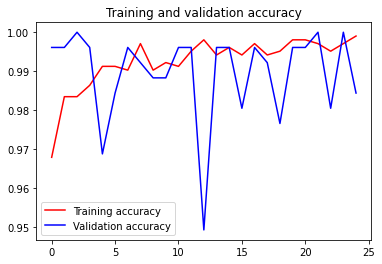

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()